In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
rng = np.random.default_rng()

In [27]:
N = 100
C = 2
N_T = 40
DT = 1

In [28]:
def s(x):
    return x**2 / 2

In [29]:
def dsdx(x):
    return x

In [30]:
def h(x, p):
    return s(x) + p**2 / 2

(array([0.28026805, 0.        , 0.        , 0.28026805, 0.        ,
        0.        , 0.        , 0.        , 0.56053609, 0.        ,
        0.56053609, 0.28026805, 0.        , 0.28026805, 0.        ,
        0.        , 0.84080414, 0.        , 0.        , 0.28026805,
        0.        , 0.        , 0.        , 0.28026805, 0.        ,
        0.28026805, 0.        , 1.12107218, 0.        , 0.56053609,
        0.        , 0.28026805, 0.84080414, 0.56053609, 0.        ,
        0.56053609, 0.56053609, 0.        , 0.28026805, 0.28026805,
        0.84080414, 0.56053609, 0.        , 0.56053609, 0.        ,
        0.        , 0.56053609, 0.84080414, 0.84080414, 0.        ,
        1.40134023, 0.56053609, 0.56053609, 0.28026805, 0.56053609,
        0.        , 0.56053609, 1.12107218, 0.        , 0.28026805,
        0.        , 0.56053609, 0.56053609, 0.        , 1.12107218,
        0.28026805, 0.56053609, 0.56053609, 0.56053609, 0.        ,
        0.        , 0.56053609, 0.28026805, 0.56

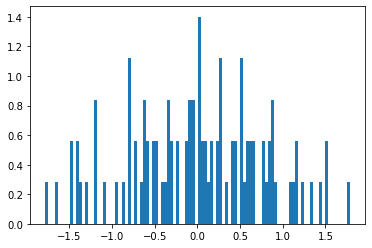

In [31]:
samples = []
update_cnt = 0
x = 0

for _ in range(N):
    tmp_p = rng.normal()
    h_init = h(x, tmp_p)
    
    tmp_x = x + tmp_p * DT / 2
    for _ in range(N_T - 1):
        tmp_p = tmp_p - dsdx(tmp_x) * DT
        tmp_x = tmp_x + tmp_p * DT
    tmp_p = tmp_p - dsdx(tmp_x) * DT
    tmp_x = tmp_x + tmp_p * DT / 2
    
    h_fin = h(tmp_x, tmp_p)
    
    if rng.random() < np.exp(h_init - h_fin):
        x = tmp_x
    samples.append(x)
    
samples = np.array(samples)
plt.hist(np.array(samples), bins=100, density=True)

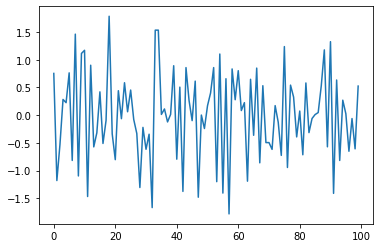

In [32]:
plt.plot(samples)